**Filip Koźlik**

**Task 1.**\
Write a function that calculates Pearson's linear correlation coefficient. Do not use any off-the-shelf functions.

In [4]:
!pip install pytest

In [20]:
%%file helpers.py
from typing import List, Tuple

class Statistics:
    @staticmethod
    def mean(data: List[float]) -> float:
        return sum(data) / len(data) if data else 0.0

    @staticmethod
    def variance(data: List[float], mean_val: float) -> float:
        return sum((x - mean_val) ** 2 for x in data) / len(data) if data else 0.0

    @staticmethod
    def covariance(x: List[float], y: List[float], mean_x: float, mean_y: float) -> float:
        if len(x) != len(y):
            raise ValueError("Lists must have the same length")

        return sum((x[i] - mean_x) * (y[i] - mean_y) for i in range(len(x))) / len(x) if x and y else 0.0

    @staticmethod
    def linear_regression_coefficients(x: List[float], y: List[float]) -> Tuple[float, float]:
        if len(x) != len(y):
            raise ValueError("Lists must have the same length")

        mean_x = Statistics.mean(x)
        mean_y = Statistics.mean(y)

        # Calculate the slope (a) and intercept (b) of the regression line
        numerator = sum((x[i] - mean_x) * (y[i] - mean_y) for i in range(len(x)))
        denominator = sum((xi - mean_x) ** 2 for xi in x)

        a = numerator / denominator if denominator != 0 else 0.0
        b = mean_y - a * mean_x

        return a, b

Overwriting helpers.py


In [6]:
%%file solutions.py
from typing import List
from helpers import *

class Solutions:
    @staticmethod
    def pearson_correlation(x: List[float], y: List[float]) -> float:
        # Check if both lists have the same length
        if len(x) != len(y):
            raise ValueError("Lists must have the same length")

        # Calculate the mean values of x and y
        mean_x = Statistics.mean(x)
        mean_y = Statistics.mean(y)

        # Calculate covariance
        covariance = Statistics.covariance(x, y, mean_x, mean_y)

        # Calculate variance for x and y
        variance_x = Statistics.variance(x, mean_x)
        variance_y = Statistics.variance(y, mean_y)

        # Calculate the Pearson correlation coefficient
        correlation = covariance / (variance_x ** 0.5 * variance_y ** 0.5) if variance_x and variance_y else 0.0

        return correlation

Writing solutions.py


In [10]:
print(Solutions.pearson_correlation([1, 2, 3], [1, 2, 3]))
print(Solutions.pearson_correlation([1, 2, 3], [3, 2, 1]))
print(Solutions.pearson_correlation([1, 2, 3], [4, 5, 6]))

1.0
-1.0
1.0


In [24]:
%%file test_pearson_correlation.py
from helpers import Statistics
from solutions import Solutions
import pytest

@pytest.fixture
def solutions_instance():
    return Solutions()

def test_pearson_correlation(solutions_instance):
    # Test correlation coefficient for identical lists
    assert solutions_instance.pearson_correlation([1, 2, 3], [1, 2, 3]) == 1.0

    # Test correlation coefficient for reversed lists
    assert solutions_instance.pearson_correlation([1, 2, 3], [3, 2, 1]) == -1.0

    # Test correlation coefficient for lists with zero correlation
    assert solutions_instance.pearson_correlation([1, 2, 3], [4, 5, 6]) == 1.0

    # Test correlation coefficient for empty lists
    with pytest.raises(ValueError, match="Lists must have the same length"):
        solutions_instance.pearson_correlation([], [1, 2, 3])

    # Test correlation coefficient for lists of different lengths
    with pytest.raises(ValueError, match="Lists must have the same length"):
        solutions_instance.pearson_correlation([1, 2, 3], [1, 2, 3, 4])

Overwriting test_pearson_correlation.py


In [18]:
!python -m pytest test_pearson_correlation.py -v

======================================= test session starts ========================================
platform linux -- Python 3.10.12, pytest-7.4.3, pluggy-1.3.0 -- /usr/bin/python3
cachedir: .pytest_cache
rootdir: /content
plugins: anyio-3.7.1
collected 1 item                                                                                   

test_pearson_correlation.py::test_pearson_correlation PASSED                                 [100%]

======================================== 1 passed in 0.01s =========================================


**Task 2.**\
Write a function that finds the coefficients of a simple regression.

In [27]:
from helpers import Statistics

x = [1, 2, 3, 4, 5]
y = [2, 4, 6, 8, 10]
a, b = Statistics.linear_regression_coefficients(x, y)
print('A: ', a)
print('B: ', b)

A:  2.0
B:  0.0


In [31]:
%%file test_linear_regression.py

import pytest
from helpers import Statistics

@pytest.fixture
def statistics_instance():
    return Statistics()

def test_linear_regression_coefficients(statistics_instance):
    # Test linear regression coefficients for a perfect linear relationship
    x = [1, 2, 3, 4, 5]
    y = [2, 4, 6, 8, 10]
    a, b = statistics_instance.linear_regression_coefficients(x, y)
    assert a == 2.0
    assert b == 0.0

    # Test linear regression coefficients for a different slope and intercept
    x = [1, 2, 3, 4, 5]
    y = [3, 5, 7, 9, 11]
    a, b = statistics_instance.linear_regression_coefficients(x, y)
    assert a == 2.0
    assert b == 1.0

    # Test linear regression coefficients for a horizontal line (slope should be 0)
    x = [1, 2, 3, 4, 5]
    y = [5, 5, 5, 5, 5]
    a, b = statistics_instance.linear_regression_coefficients(x, y)
    assert a == 0.0
    assert b == 5.0

    # Test linear regression coefficients for an empty dataset
    with pytest.raises(ValueError, match="Lists must have the same length"):
        statistics_instance.linear_regression_coefficients([], [1, 2, 3])

    # Test linear regression coefficients for lists of different lengths
    with pytest.raises(ValueError, match="Lists must have the same length"):
        statistics_instance.linear_regression_coefficients([1, 2, 3], [1, 2, 3, 4])

Overwriting test_linear_regression.py


In [32]:
!python -m pytest test_linear_regression.py -v

======================================= test session starts ========================================
platform linux -- Python 3.10.12, pytest-7.4.3, pluggy-1.3.0 -- /usr/bin/python3
cachedir: .pytest_cache
rootdir: /content
plugins: anyio-3.7.1
collected 1 item                                                                                   

test_linear_regression.py::test_linear_regression_coefficients PASSED                        [100%]

======================================== 1 passed in 0.01s =========================================


**Task 3.**\
Write a function that draws the relationship between x and y from Anscombe's. quartet

In [53]:
import numpy as np
import pandas as pd

def get_anscombe_data() -> pd.DataFrame:
    # Get data from provided url
    url = "https://pl.wikipedia.org/wiki/Kwartet_Anscombe%E2%80%99a"
    dfs = pd.read_html(url, header=0)

    # Select propper data
    df = dfs[1].drop([0])

    # Rename data columns
    df = df.rename(columns={
        'I': 'X.1',
        'I.1': 'Y.1',
        'II': 'X.2',
        'II.1': 'Y.2',
        'III': 'X.3',
        'III.1': 'Y.3',
        'IV': 'X.4',
        'IV.1': 'Y.4'
    })

    # Return data as numeric
    return df.apply(pd.to_numeric, errors='coerce')

In [52]:
df = get_anscombe_data()
df

,X.1,Y.1,X.2,Y.2,X.3,Y.3,X.4,Y.4
1,10.0,8.04,10.0,9.14,10.0,7.46,8.0,6.58
2,8.0,6.95,8.0,8.14,8.0,6.77,8.0,5.76
3,13.0,7.58,13.0,8.74,13.0,12.74,8.0,7.71
4,9.0,8.81,9.0,8.77,9.0,7.11,8.0,8.84
5,11.0,8.33,11.0,9.26,11.0,7.81,8.0,8.47
6,14.0,9.96,14.0,8.10,14.0,8.84,8.0,7.04
7,6.0,7.24,6.0,6.13,6.0,6.08,8.0,5.25
8,4.0,4.26,4.0,3.10,4.0,5.39,19.0,12.50
9,12.0,10.84,12.0,9.13,12.0,8.15,8.0,5.56
10,7.0,4.82,7.0,7.26,7.0,6.42,8.0,7.91


In [57]:
import matplotlib.pyplot as plt
import pandas as pd

def plot_anscombe(dataframe: pd.DataFrame) -> None:
    # Create a 2x2 subplot layout for each Anscombe's quartet
    fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 8))

    # Iterate through columns (X.1, Y.1, X.2, Y.2, etc.) and plot charts for each quartet
    for i, ax in enumerate(axes.flatten()):
        x_col = f'X.{i+1}'
        y_col = f'Y.{i+1}'

        ax.scatter(dataframe[x_col], dataframe[y_col], label=f'Q{i+1}')
        ax.set_title(f'Quartet {i+1}')
        ax.set_xlabel(f'X.{i+1}')
        ax.set_ylabel(f'Y.{i+1}')
        ax.legend()

    # Adjust subplot layout
    plt.tight_layout()
    plt.show()

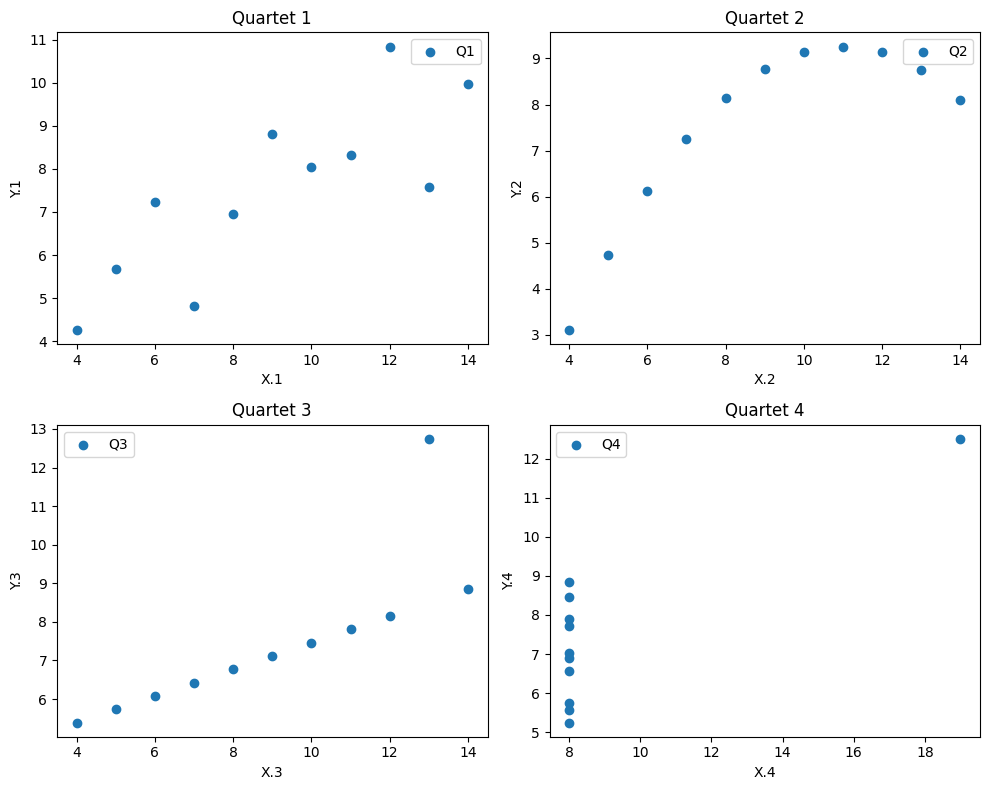

In [58]:
plot_anscombe(df)

**Task 4.**\
Check the Pearson correlation coefficient.

In [63]:
from solutions import Solutions

# Dataset 1
x_1 = df['X.1'].tolist()
y_1 = df['Y.1'].tolist()
print('Dataset 1: ', Solutions.pearson_correlation(x_1, y_1))

# Dataset 2
x_2 = df['X.2'].tolist()
y_2 = df['Y.2'].tolist()
print('Dataset 2: ', Solutions.pearson_correlation(x_2, y_2))

# Dataset 3
x_3 = df['X.3'].tolist()
y_3 = df['Y.3'].tolist()
print('Dataset 3: ', Solutions.pearson_correlation(x_3, y_3))

# Dataset 4
x_4 = df['X.4'].tolist()
y_4 = df['Y.4'].tolist()
print('Dataset 4: ', Solutions.pearson_correlation(x_4, y_4))

Dataset 1:  0.8164205163448399
Dataset 2:  0.8162365060002427
Dataset 3:  0.8162867394895982
Dataset 4:  0.8165214368885028


**Task 5.**\
Apply the statsmodels and seaborn library to the data from point 3 to obtain a simple regression model and corresponding graphs.

In [64]:
!pip install statsmodels seaborn

<ipython-input-72-28b777bea4c9>:7: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for indx, col_name in enumerate(df.iteritems()):
/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


                                 OLS Regression Results                                
Dep. Variable:                    Y.1   R-squared (uncentered):                   0.963
Model:                            OLS   Adj. R-squared (uncentered):              0.959
Method:                 Least Squares   F-statistic:                              257.9
Date:                Tue, 28 Nov 2023   Prob (F-statistic):                    1.81e-08
Time:                        17:28:55   Log-Likelihood:                         -20.044
No. Observations:                  11   AIC:                                      42.09
Df Residuals:                      10   BIC:                                      42.49
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

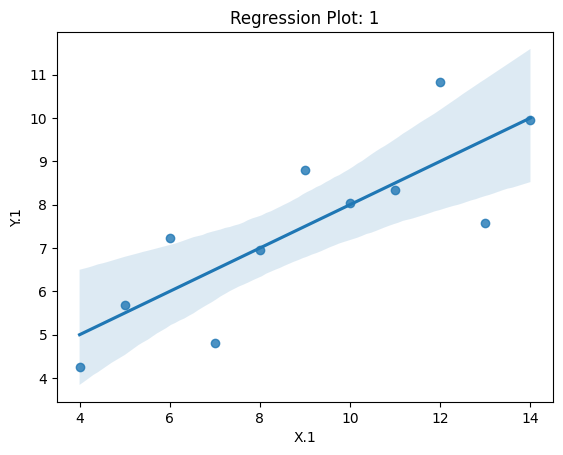



                                 OLS Regression Results                                
Dep. Variable:                    Y.2   R-squared (uncentered):                   0.963
Model:                            OLS   Adj. R-squared (uncentered):              0.959
Method:                 Least Squares   F-statistic:                              257.7
Date:                Tue, 28 Nov 2023   Prob (F-statistic):                    1.82e-08
Time:                        17:28:55   Log-Likelihood:                         -20.049
No. Observations:                  11   AIC:                                      42.10
Df Residuals:                      10   BIC:                                      42.50
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------

/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


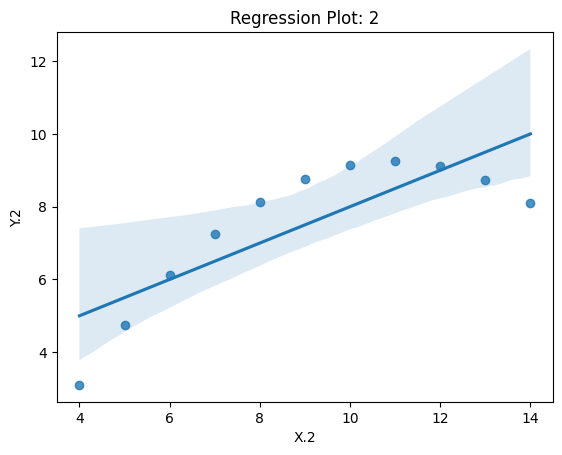



                                 OLS Regression Results                                
Dep. Variable:                    Y.3   R-squared (uncentered):                   0.963
Model:                            OLS   Adj. R-squared (uncentered):              0.959
Method:                 Least Squares   F-statistic:                              257.7
Date:                Tue, 28 Nov 2023   Prob (F-statistic):                    1.82e-08
Time:                        17:28:55   Log-Likelihood:                         -20.047
No. Observations:                  11   AIC:                                      42.09
Df Residuals:                      10   BIC:                                      42.49
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------

/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


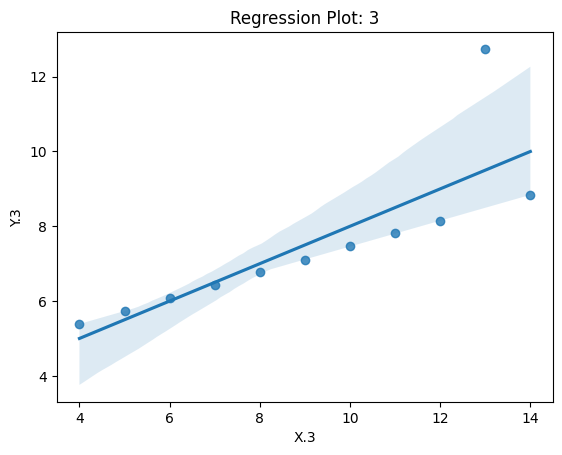



                                 OLS Regression Results                                
Dep. Variable:                    Y.4   R-squared (uncentered):                   0.963
Model:                            OLS   Adj. R-squared (uncentered):              0.959
Method:                 Least Squares   F-statistic:                              258.0
Date:                Tue, 28 Nov 2023   Prob (F-statistic):                    1.81e-08
Time:                        17:28:56   Log-Likelihood:                         -20.043
No. Observations:                  11   AIC:                                      42.09
Df Residuals:                      10   BIC:                                      42.48
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------

/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


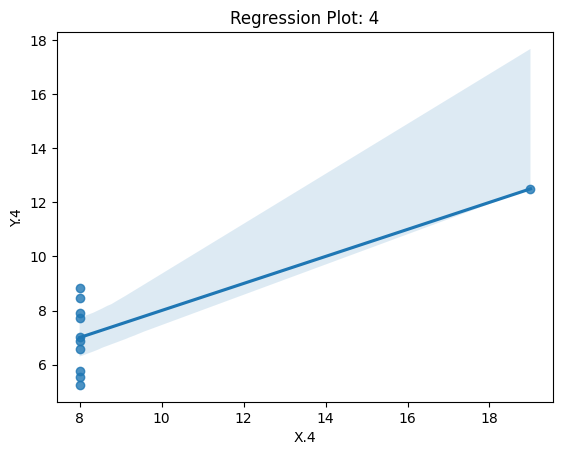

In [72]:
import seaborn as sns
import statsmodels.api as sm
import matplotlib.pyplot as plt

def create_regression_model_with_plots() -> None:

    for indx, col_name in enumerate(df.iteritems()):

      if indx + 1 >= 5:
        return

      x_col = f'X.{indx + 1}'
      y_col = f'Y.{indx + 1}'

      # Create model stats
      X = sm.add_constant(df[x_col])
      model = sm.OLS(df[y_col], df[x_col]).fit()
      print(model.summary())

      # Create plot
      sns.regplot(x=x_col, y=y_col, data=df)
      plt.title(f'Regression Plot: {indx + 1}')
      plt.show()

      print('\n')

create_regression_model_with_plots()